In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Read the Data

In [2]:
fraud=pd.read_csv('../Datasets/Fraud_check (1).csv')

In [3]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## EDA

In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [5]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
fraud.duplicated().sum()

0

In [8]:
fdata=fraud.copy()

In [9]:
fdata.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [10]:
fdata.insert(6,'tax'," ")

for i in range(0,len(fdata['Taxable.Income']),1):
    if fdata['Taxable.Income'].iloc[i]<=30000:
        fdata['tax'].iloc[i]='Risky'
    else:
        fdata['tax'].iloc[i]='Good'

In [11]:
fdata

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [12]:
fdata.tax.value_counts()

Good     476
Risky    124
Name: tax, dtype: int64

In [13]:
fdata.drop(['Taxable.Income'], axis=1, inplace=True)

In [14]:
fdata.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [15]:
from sklearn.preprocessing import LabelEncoder

In [17]:
enc=LabelEncoder()

fdata['Undergrad']=enc.fit_transform(fdata['Undergrad'])
fdata['Marital.Status']=enc.fit_transform(fdata['Marital.Status'])
fdata['Urban']=enc.fit_transform(fdata['Urban'])
fdata['tax']=enc.fit_transform(fdata['tax'])

In [18]:
fdata.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


## Visualization

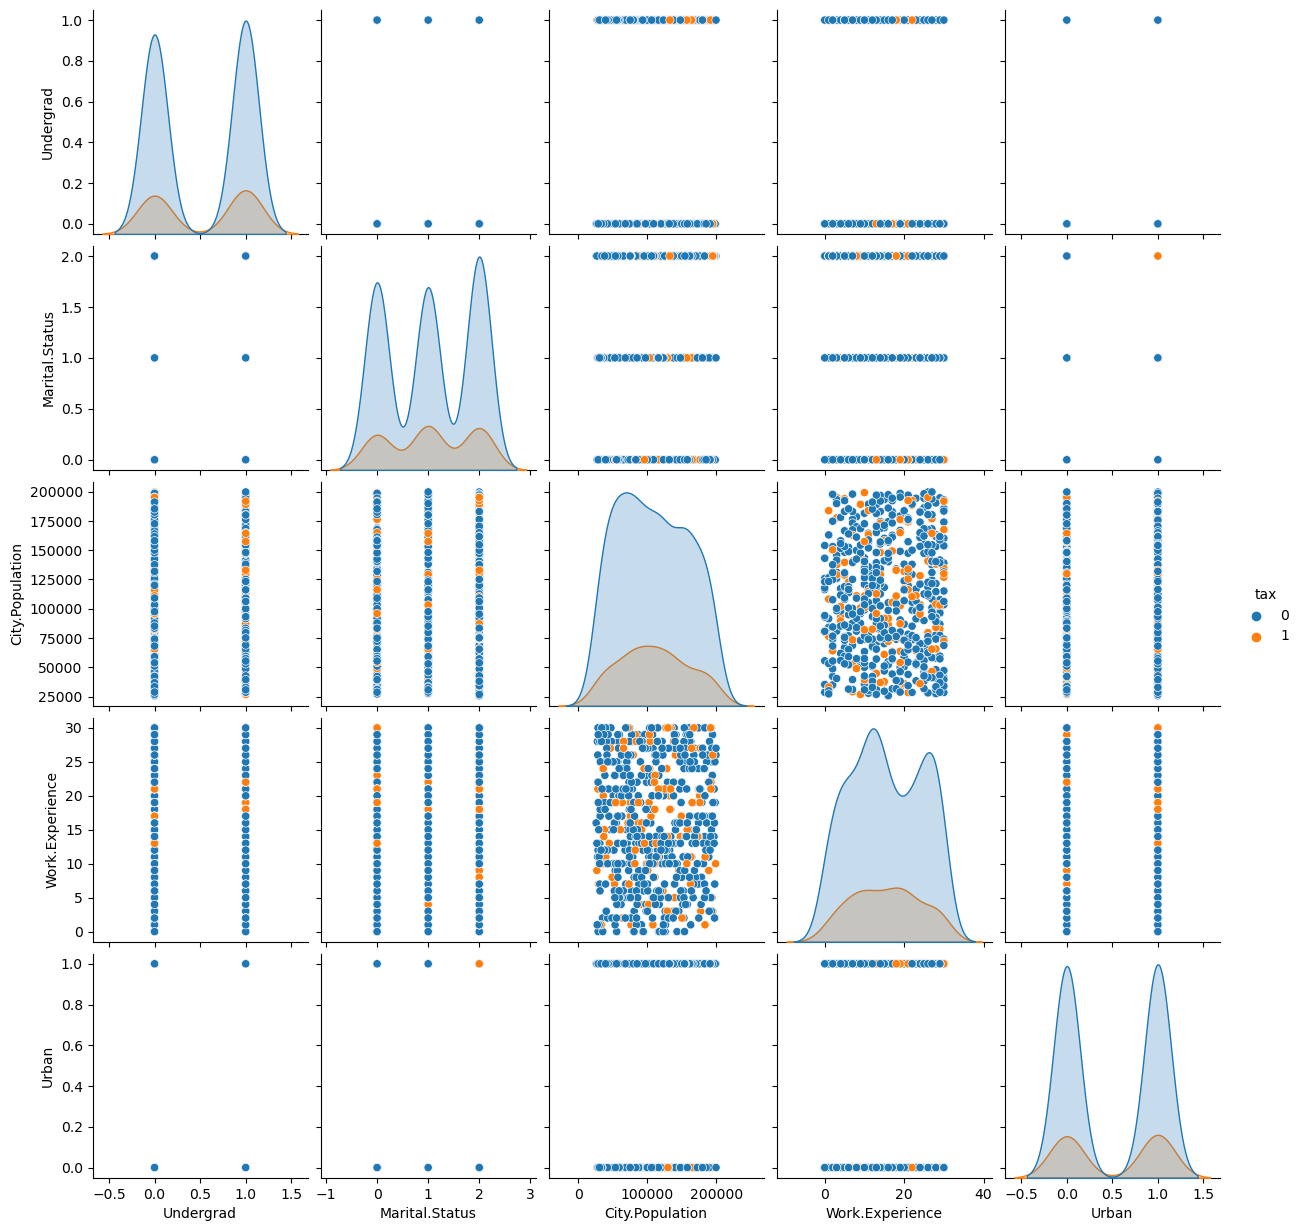

In [19]:
sns.pairplot(data=fdata, hue='tax')
plt.show()

<Axes: >

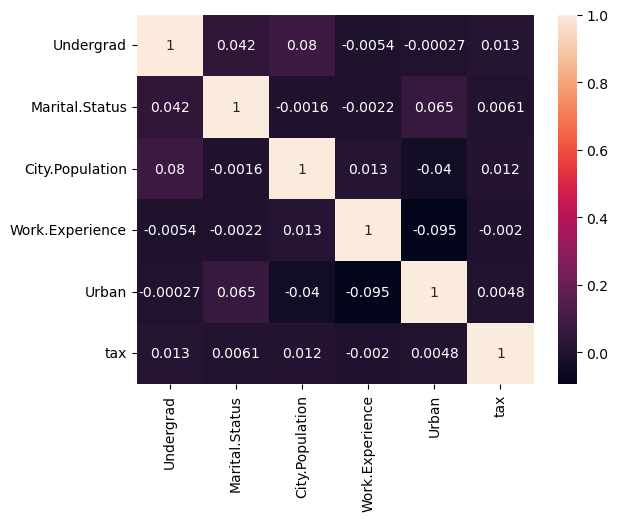

In [20]:
sns.heatmap(fdata.corr(), annot=True)

## Model building using RandomForest

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [25]:
X=fdata.iloc[:,0:5]
y=fdata['tax']

In [26]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [27]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: tax, Length: 600, dtype: int32

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
xtrain

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
145,0,0,197422,2,1
9,1,0,155482,4,1
375,0,1,130935,2,0
523,0,0,42198,12,0
188,0,0,137569,10,0
...,...,...,...,...,...
71,0,2,105680,22,0
106,1,2,58535,20,1
270,0,1,130680,5,0
435,0,0,111774,4,1


In [30]:
xtest

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
110,0,2,32450,19,1
419,0,1,138074,20,0
565,0,0,31064,28,0
77,1,1,118344,26,0
181,0,0,36116,20,0
...,...,...,...,...,...
399,0,2,74497,21,0
340,1,1,54437,21,1
148,0,1,197038,21,0
494,0,2,197045,13,1


In [31]:
ytrain

145    0
9      0
375    0
523    0
188    1
      ..
71     0
106    1
270    0
435    0
102    0
Name: tax, Length: 480, dtype: int32

In [32]:
ytest

110    1
419    0
565    0
77     0
181    1
      ..
399    0
340    0
148    0
494    0
439    1
Name: tax, Length: 120, dtype: int32

In [33]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((480, 5), (480,), (120, 5), (120,))

In [34]:
model=RandomForestClassifier(n_estimators=30,max_depth=4, random_state=42)
model.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=4, n_estimators=30, random_state=42)

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
pred=model.predict(xtrain)

In [37]:
conf=confusion_matrix(pred,ytrain)

<Axes: >

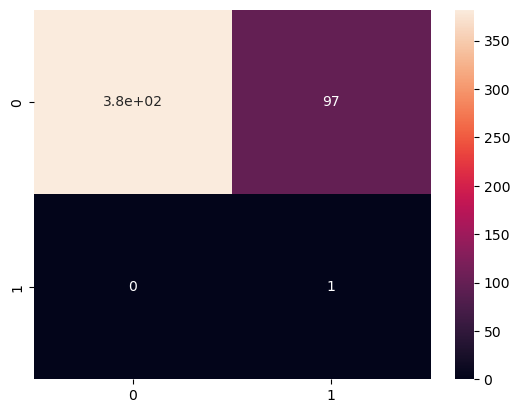

In [38]:
sns.heatmap(conf,annot=True)

In [39]:
conf

array([[382,  97],
       [  0,   1]], dtype=int64)

In [40]:
print(classification_report(ytrain,pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       382
           1       1.00      0.01      0.02        98

    accuracy                           0.80       480
   macro avg       0.90      0.51      0.45       480
weighted avg       0.84      0.80      0.71       480



In [41]:
## Accuracy
np.mean(pred==ytrain)

0.7979166666666667

In [42]:
print("Accuracy",accuracy_score(ytrain,pred))

Accuracy 0.7979166666666667


## preduction for test data

In [43]:
pred1=model.predict(xtest)

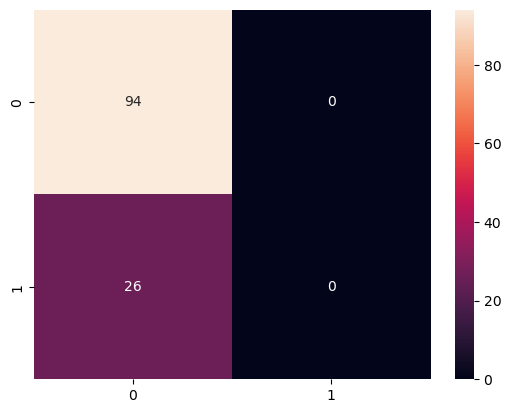

In [44]:
conf1=confusion_matrix(ytest,pred1)
sns.heatmap(conf1,annot=True)
plt.show()

In [45]:
conf1

array([[94,  0],
       [26,  0]], dtype=int64)

In [46]:
print(classification_report(pred1,ytest))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88       120
           1       0.00      0.00      0.00         0

    accuracy                           0.78       120
   macro avg       0.50      0.39      0.44       120
weighted avg       1.00      0.78      0.88       120



In [47]:
## Accuracy
np.mean(pred1==ytest)

0.7833333333333333

In [48]:
print("Accuracy",accuracy_score(ytest,pred1))

Accuracy 0.7833333333333333
